# Sarah's Branch
o  SARAH - What’s the correlation between popularity and the following?
§ Length of track
§ Danceability score
§ Explicit
§ Release Date
§ Artist

In [1]:
#clean up csv files
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [2]:
#variables for files
file = 'Data/data.csv'
file_genre = 'Data/data_by_genres.csv'

In [3]:
#import csvs
genre_df = pd.read_csv(file_genre)
df = pd.read_csv(file)

In [4]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [5]:
#remove brackets, quotations, etc.
clean_df = df
clean_df['artists'] = df['artists'].str.strip('[]')
clean_df['artists'] = df['artists'].str.strip("''")
clean_df['artists'] = df['artists'].str.strip('""')
clean_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,Mamie Smith,0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,Screamin' Jay Hawkins,0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,Mamie Smith,0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,Oscar Velazquez,0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,Mixe,0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [6]:
#Drop columns and change column names
clean_df = clean_df[["artists", "danceability", "duration_ms", "explicit", "key", "mode", "name",
                     "popularity", "tempo", "year"]]
clean_df = clean_df.rename(columns={"artists":"Artists", "danceability":"Danceability (0-1)", 
                                    "duration_ms":"Duration (seconds)", "explicit":"Explicit",
                                    "key":"Key", "mode":"Mode", "name":"Song Title",
                                    "popularity":"Popularity (0-100)", "tempo":"Tempo (BPM)", "year":"Release Year"})

clean_df.head()

,Artists,Danceability (0-1),Duration (seconds),Explicit,Key,Mode,Song Title,Popularity (0-100),Tempo (BPM),Release Year
0,Mamie Smith,0.598,168333,0,5,0,Keep A Song In Your Soul,12,149.976,1920
1,Screamin' Jay Hawkins,0.852,150200,0,5,0,I Put A Spell On You,7,86.889,1920
2,Mamie Smith,0.647,163827,0,0,1,Golfing Papa,4,97.600,1920
3,Oscar Velazquez,0.730,422087,0,2,1,True House Music - Xavier Santos & Carlos Gomi...,17,127.997,1920
4,Mixe,0.704,165224,1,10,0,Xuniverxe,2,122.076,1920


In [7]:
#update columns with more relevant values
clean_df["Duration (seconds)"] = ((clean_df["Duration (seconds)"]) / 1000)
clean_df['Explicit'] = clean_df['Explicit'].apply(str)
clean_df['Explicit'] = clean_df['Explicit'].str.replace('0', 'No')
clean_df['Explicit'] = clean_df['Explicit'].str.replace('1', 'Yes')
clean_df['Mode'] = clean_df['Mode'].apply(str)
clean_df['Mode'] = clean_df['Mode'].str.replace('0', 'Minor')
clean_df['Mode'] = clean_df['Mode'].str.replace('1', 'Major')
clean_df['Key'] = clean_df['Key'].apply(str)
clean_df['Key'] = clean_df['Key'].str.replace('10', 'Bb')
clean_df['Key'] = clean_df['Key'].str.replace('11', 'B')
clean_df['Key'] = clean_df['Key'].str.replace('0', 'C')
clean_df['Key'] = clean_df['Key'].str.replace('1', 'Db')
clean_df['Key'] = clean_df['Key'].str.replace('2', 'D')
clean_df['Key'] = clean_df['Key'].str.replace('3', 'Eb')
clean_df['Key'] = clean_df['Key'].str.replace('4', 'E')
clean_df['Key'] = clean_df['Key'].str.replace('5', 'F')
clean_df['Key'] = clean_df['Key'].str.replace('6', 'Gb')
clean_df['Key'] = clean_df['Key'].str.replace('7', 'G')
clean_df['Key'] = clean_df['Key'].str.replace('8', 'Ab')
clean_df['Key'] = clean_df['Key'].str.replace('9', 'A')

clean_df.head()

,Artists,Danceability (0-1),Duration (seconds),Explicit,Key,Mode,Song Title,Popularity (0-100),Tempo (BPM),Release Year
0,Mamie Smith,0.598,168.333,No,F,Minor,Keep A Song In Your Soul,12,149.976,1920
1,Screamin' Jay Hawkins,0.852,150.200,No,F,Minor,I Put A Spell On You,7,86.889,1920
2,Mamie Smith,0.647,163.827,No,C,Major,Golfing Papa,4,97.600,1920
3,Oscar Velazquez,0.730,422.087,No,D,Major,True House Music - Xavier Santos & Carlos Gomi...,17,127.997,1920
4,Mixe,0.704,165.224,Yes,Bb,Minor,Xuniverxe,2,122.076,1920


In [8]:
#Clean up second dataframe
#Drop columns and change column names
clean_genre_df = genre_df
clean_genre_df = clean_genre_df[["genres", "danceability", "tempo", 
                                 "popularity", "key", "mode"]]
clean_genre_df = clean_genre_df.rename(columns={"genres":"Genres", "danceability":"Danceability (0-1)", 
                                                "key":"Key", "mode":"Mode",
                                                "popularity":"Popularity (0-100)", "tempo":"Tempo (BPM)"})

clean_genre_df.head()

,Genres,Danceability (0-1),Tempo (BPM),Popularity (0-100),Key,Mode
0,21st century classical,0.284100,91.351000,6.600000,4,1
1,432hz,0.312000,118.900933,41.200000,11,1
2,8-bit,0.673000,192.816000,0.000000,5,1
3,[],0.546937,116.068980,12.350770,7,1
4,a cappella,0.516172,105.506031,39.086248,7,1


In [9]:
#drop row with bad data
clean_genre_df = clean_genre_df.drop(3)

In [10]:
#update columns with more relevant values

clean_genre_df['Mode'] = clean_genre_df['Mode'].apply(str)
clean_genre_df['Mode'] = clean_genre_df['Mode'].str.replace('0', 'Minor')
clean_genre_df['Mode'] = clean_genre_df['Mode'].str.replace('1', 'Major')
clean_genre_df['Key'] = clean_genre_df['Key'].apply(str)
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('10', 'Bb')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('11', 'B')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('0', 'C')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('1', 'Db')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('2', 'D')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('3', 'Eb')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('4', 'E')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('5', 'F')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('6', 'Gb')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('7', 'G')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('8', 'Ab')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('9', 'A')

clean_genre_df.head()

,Genres,Danceability (0-1),Tempo (BPM),Popularity (0-100),Key,Mode
0,21st century classical,0.284100,91.351000,6.600000,E,Major
1,432hz,0.312000,118.900933,41.200000,B,Major
2,8-bit,0.673000,192.816000,0.000000,F,Major
4,a cappella,0.516172,105.506031,39.086248,G,Major
5,abstract,0.473600,142.495400,43.800000,F,Major


o  SARAH - What’s the correlation between popularity and the following?
§ Length of track
§ Danceability score
§ Explicit
§ Release Date
§ Artist

In [11]:
Artist_Popularity = clean_df.groupby(["Artists"])["Popularity (0-100)"].mean().reset_index()
Artist_Popularity

,Artists,Popularity (0-100)
0,$0dg0d,0.0
1,$NOT,77.0
2,"$NOT', 'Flo Milli",75.0
3,"$NOT', 'Maggie Lindemann",76.0
4,"$NOT', 'Wifisfuneral",68.0
...,...,...
36190,黑豹,34.0
36191,龔詩嘉,17.0
36192,김수철,24.0
36193,"김효근', 'Quinever 퀸에버",0.0


In [12]:
Top_Artists = Artist_Popularity.sort_values("Popularity (0-100)", ascending=False)
Top_Artists.head(10)

,Artists,Popularity (0-100)
125,"24kGoldn', 'iann dior",96.0
4773,CJ,94.0
2925,"Bad Bunny', 'ROSALÍA",94.0
2920,"Bad Bunny', 'Jhay Cortez",93.0
4362,Boza,92.0
5026,"Cardi B', 'Megan Thee Stallion",92.0
17301,"Justin Bieber', 'benny blanco",92.0
7056,"DaBaby', 'Roddy Ricch",91.0
25556,"Pop Smoke', 'Lil Baby', 'DaBaby",91.0
23101,"Myke Towers', 'Juhn",91.0


In [13]:
Popular_Single_Artists = [{"Artist": "CJ", "Popularity" : "94.0"},
                           {"Artist":"Boza", "Popularity" : "92.0"},
                           {"Artist": "HVME", "Popularity" : "90.0"},
                           {"Artist": "Farruko", "Popularity" : "90.0"},
                           {"Artist": "Camilo", "Popularity" : "90.0"},
                           {"Artist": "Ritt Momney", "Popularity" : "89.0"},
                           {"Artist": "Justin Quiles", "Popularity" : "86.5"},
                           {"Artist": "Regard", "Popularity" : "86.0"},
                           {"Artist": "Jerry Di", "Popularity" : "86.0"},
                           {"Artist": "Fousheé", "Popularity" : "86.0"}]

# Convert a list of dictionaries into a dataframe
Popular_Single_Artists_DF = pd.DataFrame(Popular_Single_Artists)
Popular_Single_Artists_DF

,Artist,Popularity
0,CJ,94.0
1,Boza,92.0
2,HVME,90.0
3,Farruko,90.0
4,Camilo,90.0
5,Ritt Momney,89.0
6,Justin Quiles,86.5
7,Regard,86.0
8,Jerry Di,86.0
9,Fousheé,86.0


In [14]:
Popular_Single_Artists_DF.dtypes

Artist        object
Popularity    object
dtype: object

In [15]:
Popular_Single_Artists_DF.sort_values('Popularity',inplace=True)

In [16]:
Popular_Single_Artists_DF["Popularity"].astype(float)

7    86.0
8    86.0
9    86.0
6    86.5
5    89.0
2    90.0
3    90.0
4    90.0
1    92.0
0    94.0
Name: Popularity, dtype: float64

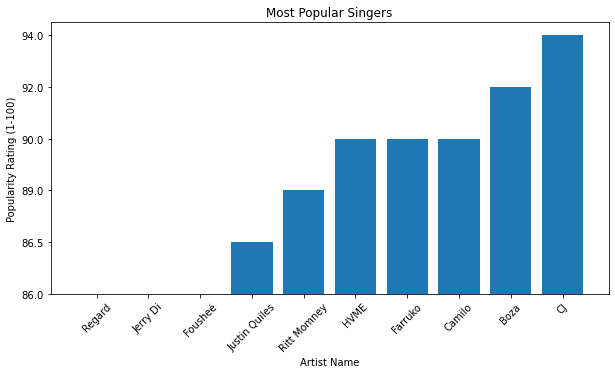

In [17]:
x_axis = Popular_Single_Artists_DF["Artist"]
y_axis = Popular_Single_Artists_DF["Popularity"]
plt.figure(figsize=(10,5))
plt.title("Most Popular Singers")
plt.xlabel("Artist Name")
plt.ylabel("Popularity Rating (1-100)")
plt.xticks(rotation=45)
plt.bar(x_axis, y_axis)
plt.show
plt.savefig("Images/Popular_Singers", bbox_inches="tight")

In [18]:
Explicit_Group = clean_df.groupby(["Explicit"])["Popularity (0-100)"].mean().reset_index()
Explicit_Group

,Explicit,Popularity (0-100)
0,No,24.791166
1,Yes,38.032739


In [19]:
Explicit_Group["Popularity (0-100)"].astype(float)

0    24.791166
1    38.032739
Name: Popularity (0-100), dtype: float64

In [20]:
Explicit_Group["Explicit"].astype(str)

0     No
1    Yes
Name: Explicit, dtype: object

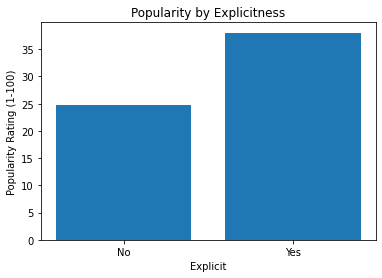

In [21]:
x_axis_Explicit = Explicit_Group["Explicit"]
y_axis_Explicit = Explicit_Group["Popularity (0-100)"]

plt.title("Popularity by Explicitness")
plt.xlabel("Explicit")
plt.ylabel("Popularity Rating (1-100)")
#plt.xticks(rotation=45)

plt.bar(x_axis_Explicit, y_axis_Explicit)
plt.show
plt.savefig("Images/Popular_Explicit", bbox_inches="tight")


In [22]:
#Find range for years.
#clean_df.describe()

#create new call-name for dataframe
decade_data = clean_df

#Minimum year is 1920, with max being 2021. Now we set our bins.
bins = [1920, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019]

decade = ["1920s", "1930s", "1940s", "1950s", "1960s", "1970s", "1980s", "1990s", "2000s", "2010s"]

#Using bins we create a column just for them.
decade_data["Decades"] = pd.cut(decade_data["Release Year"], bins, labels=decade, include_lowest=True)

#Drop rows for 2020 and 2021, as these are for an incomplete decade.
decade_data.dropna()

Decade_Groups = decade_data.groupby(["Decades"])["Popularity (0-100)"].mean().reset_index()
Decade_Groups
#clean_df.groupby(["Explicit"])["Popularity (0-100)"].mean().reset_index()

,Decades,Popularity (0-100)
0,1920s,1.193926
1,1930s,2.213304
2,1940s,1.810882
3,1950s,10.723700
4,1960s,26.388679
5,1970s,34.542499
6,1980s,36.956810
7,1990s,43.120769
8,2000s,43.167320
9,2010s,29.579203


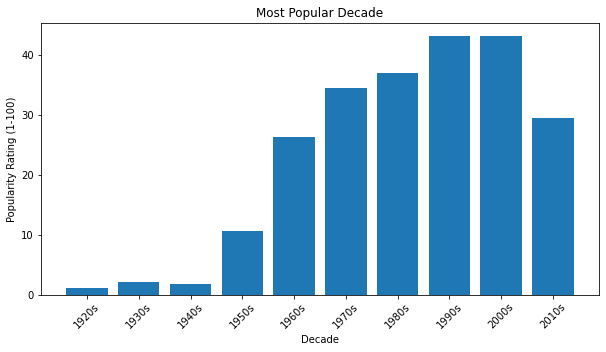

In [23]:
x_axis = Decade_Groups["Decades"]
y_axis = Decade_Groups["Popularity (0-100)"]
plt.figure(figsize=(10,5))
plt.title("Most Popular Decade")
plt.xlabel("Decade")
plt.ylabel("Popularity Rating (1-100)")
plt.xticks(rotation=45)

plt.bar(x_axis, y_axis)
plt.savefig("Images/Popular_by_Decade", bbox_inches="tight")


In [24]:
#Decades_Cor = Decade_Groups.iloc[:,0]
#Popularity_Cor =  Decade_Groups.iloc[:,1]

#correlation=st.pearsonr(Decades_Cor.astype(float), Popularity_Cor.astype(float))
#print(f"The correlation between danceability and popularity is {round(correlation[0],2)}")

In [25]:
#create new call-name for dataframe
Danceability = clean_df

#Minimum danceability is 0.0, with max being 1. Now we set our bins.
bins = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

Rating = ["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]

#Using bins we create a column just for them.
Danceability["Dance Grouped"] = pd.cut(Danceability["Danceability (0-1)"], bins, labels=Rating, include_lowest=True)

#Drop rows for 2020 and 2021, as these are for an incomplete decade.
Danceability.dropna()

Danceability_Groups = Danceability.groupby(["Dance Grouped"])["Popularity (0-100)"].mean().reset_index()

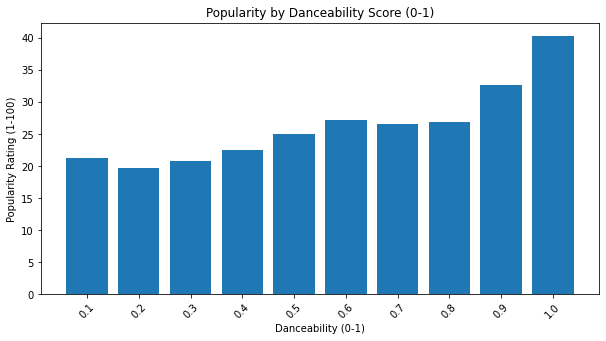

In [26]:
x_axis_Dance = Danceability_Groups["Dance Grouped"]
y_axis_Dance = Danceability_Groups["Popularity (0-100)"]
plt.figure(figsize=(10,5))
plt.title("Popularity by Danceability Score (0-1)")
plt.xlabel("Danceability (0-1)")
plt.ylabel("Popularity Rating (1-100)")
plt.xticks(rotation=45)
plt.bar(x_axis_Dance, y_axis_Dance)
correlation = st.pearsonr(x_axis_Dance.astype(float),y_axis_Dance)
#print(f"The correlation between danceability and popularity is {round(correlation[0],2)}")
plt.savefig("Images/Popular_by_Danceability", bbox_inches="tight")
plt.show()